## Ejercicio 1:
Construir un dataset haciendo web scraping de páginas web de su elección.

- Definir 4 categorías de noticias/artículos.
- Para cada categoría, extraer los siguientes datos de 10 noticias diferentes:
- url (sitio web donde se publicó el artículo)
- título (título del artículo) ○ texto (contenido del artículo)

Recomendaciones: elegir blogs para evitar los límites de lectura para los medios que
exigen suscripción. Investigue sobre el archivo robots.txt y téngalo en cuenta. Considere
también espaciar las consultas para evitar saturar el sitio.
Utilizando los datos obtenidos construya el dataset en formato csv.

In [ ]:
import requests
from bs4 import BeautifulSoup

#Robots en head de xataka:
- `<meta name="robots" content="noodp">`
Meta robots noodp

Prevents Search engine (Google, Yahoo and MSN)  to display its own description taken from its directory, instead of you meta description. Using below tag would ensure that Search engine would display your meta description below search results and it would be useful to improve your CTR.


In [ ]:
url='https://www.xataka.com/categoria/'
categorias_elegidas=['medicina-y-salud', 'inteligencia-artificial', 'cine-y-tv', 'ordenadores']



def ejer_1(url, categorias_elegidas):
    url_cats = [url + x for x in categorias_elegidas]
    categorias = [[] for _ in range(len(url_cats))]

    for i in range(len(url_cats)):
        r = requests.get(url_cats[i])
        urls_cat_i = []
        soup = BeautifulSoup(r.text, "html.parser")

        for x in soup.findAll('h2', class_="abstract-title")[:10]:
            href_i = x.find('a').get('href')
            r_i = requests.get(href_i)
            soup_i = BeautifulSoup(r_i.text, "html.parser")
            hi_content = soup_i.find('h1', class_="post-title")

            if hi_content is None:
                hi_content = soup_i.find('h1', class_="post-title-featured")
                # ver poruq contenido  featured no pertenece a categoria
                # continue

            title_i = hi_content.get_text()

            p_i_content = soup_i.find('div', class_="article-content").findAll('p')
            p_i = '\n'.join(par.text for par in p_i_content)

            categorias[i].append({'url': href_i, 'titulo': title_i, 'texto': p_i})

    return categorias





In [ ]:
una=ejer_1(url, categorias_elegidas)

In [ ]:
len(una)

4

#Utilizando los datos obtenidos construya el dataset en formato csv.


In [ ]:

def export_csv(datos, usar_df):
  import pandas as pd

  data = pd.DataFrame()

  for i, categoria in enumerate(datos):
      for x in categoria:

          nueva_fila = {
              'Categoria': categorias_elegidas[i],
              'COD_Categoria': i,
              'url': x['url'],
              'Titulo': x['titulo'].strip().replace('\n', '').strip(),
              'Texto': x['texto'].strip().replace('\n', '').strip()
          }
          data = data.append(nueva_fila, ignore_index=True)



  data.to_csv('dataset_export.csv', index=False)
  return data if usar_df is True else None



In [ ]:
un_df=export_csv(una, True)

<ipython-input-5-106e357fd8c4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(nueva_fila, ignore_index=True)
<ipython-input-5-106e357fd8c4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(nueva_fila, ignore_index=True)
<ipython-input-5-106e357fd8c4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(nueva_fila, ignore_index=True)
<ipython-input-5-106e357fd8c4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(nueva_fila, ignore_index=True)
<ipython-input-5-106e357fd8c4>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [ ]:
un_df.head()

,Categoria,COD_Categoria,url,Titulo,Texto
0,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/genes-...,Los “genes saltarines” son uno de los culpable...,Los transposones son fragmentos de ADN que “sa...
1,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/comer-...,Comer a altas horas de la madrugada es una pés...,Si hay algo que distingue a los hábitos alimen...
2,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/hay-nu...,Hay una nueva esperanza para prolongar la vida...,La lucha contra el cáncer tiene muchas dimensi...
3,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/nueva-...,La ciencia que hay detrás de la “vacuna contra...,"Lo lógico es irnos a Dallas, a un pequeño estu..."
4,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/grande...,Las grandes farmacéuticas ya saben cuál es el ...,"Poco a poco y sin demasiada oposición, la obes..."


#Ejercicio 2:
Utilizando los datos de título y categoría del dataset del ejercicio anterior, entrenar un modelo de clasificación de noticias en categorías específicas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Descargamos los stopwords que necesitaremos luego
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtenemos las stopwords para español
spanish_stop_words = stopwords.words('spanish')

labels = [(indice, categoria) for indice, categoria in enumerate(categorias_elegidas)]

dataset = []

for x in un_df.itertuples():
  dataset.append((x.COD_Categoria, x.Texto))

# Preparar X e y
X = [text.lower() for label, text in dataset]
y = [label for label, text in dataset]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización de los textos con eliminación de palabras vacías
vectorizer = TfidfVectorizer(stop_words=spanish_stop_words)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Creación y entrenamiento del modelo de Regresión Logística
modelo_LR = LogisticRegression(max_iter=1000)
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Precisión Regresión Logística: 0.375
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      0.00      0.00         4
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1

    accuracy                           0.38         8
   macro avg       0.79      0.62      0.49         8
weighted avg       0.90      0.38      0.33         8



In [ ]:
# Definimos una lista de frases para clasificar
nuevas_frases = [
    "me gusta saber sobre la salud y los medicamentos",
    "La inteligencia artificial es fascinante.",
    "tengo ganas de ir al cine esta noche",
    "creo lo mejor es comprar una computadora con un buen procesador"

]

# Convertimos las frases a minúsculas
nuevas_frases = [frase.lower() for frase in nuevas_frases]

# Transformamos las nuevas frases usando el vectorizador que usamos para entrenar el modelo
nuevas_frases_vectorizadas = vectorizer.transform(nuevas_frases)

# Usamos el modelo entrenado para predecir las etiquetas de las nuevas frases
etiquetas_predichas = modelo_LR.predict(nuevas_frases_vectorizadas)

# Imprimimos las etiquetas predichas
for i, etiqueta in enumerate(etiquetas_predichas):
    print(f"La frase '{nuevas_frases[i]}' pertenece a la categoría: {labels[etiqueta][1]}")

La frase 'me gusta saber sobre la salud y los medicamentos' pertenece a la categoría: medicina-y-salud
La frase 'la inteligencia artificial es fascinante.' pertenece a la categoría: inteligencia-artificial
La frase 'tengo ganas de ir al cine esta noche' pertenece a la categoría: medicina-y-salud
La frase 'creo lo mejor es comprar una computadora con un buen procesador' pertenece a la categoría: medicina-y-salud


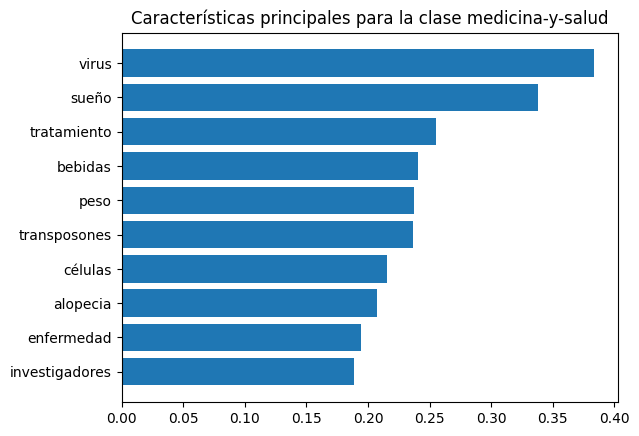

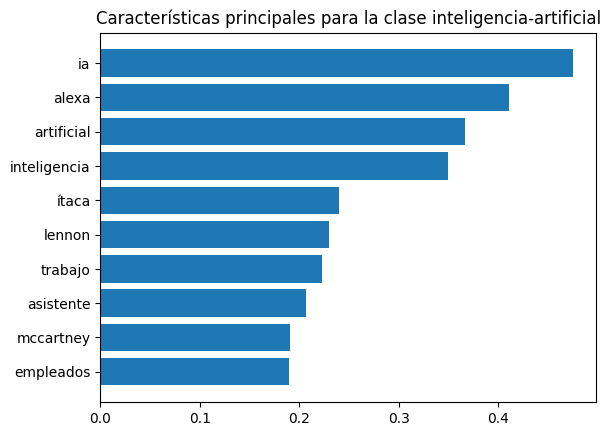

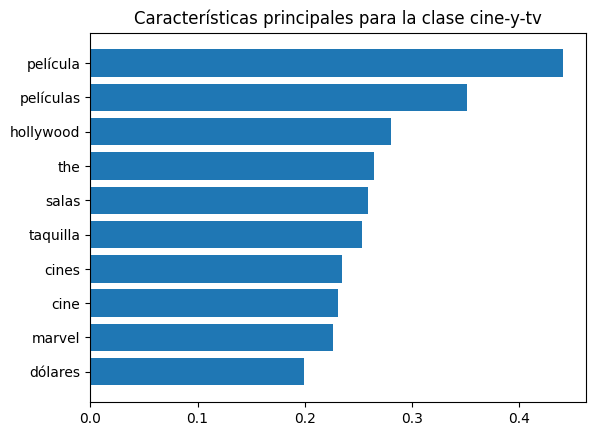

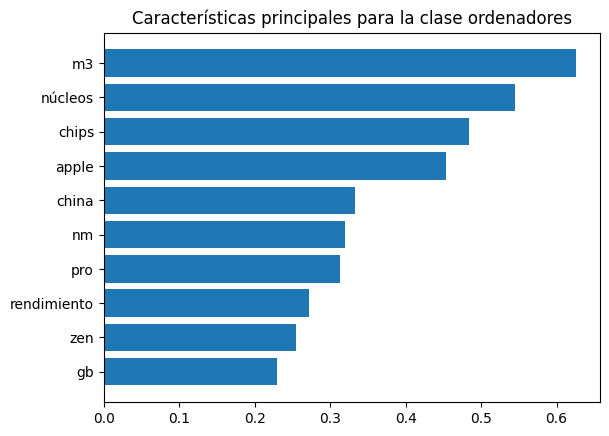

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# EN EJER 3 SE HACE ALGO PARECIDO, VER
feature_names = vectorizer.get_feature_names_out()
coef = modelo_LR.coef_

num_top_features = 10
for i, label in labels:
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_names = [feature_names[j] for j in top_features_idx]
    top_features_coef = coef[i][top_features_idx]

    plt.figure()
    plt.barh(top_features_names, top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.show()

#Ejercicio 3:
Para cada categoría, realizar las siguientes tareas:
- Procesar el texto mediante recursos de normalización y limpieza.
- Con el resultado anterior, realizar conteo de palabras y mostrar la importancia de las
mismas mediante una nube de palabras.
Escribir un análisis general del resultado obtenido.


In [ ]:
!pip install pandas nltk matplotlib wordcloud

# Conteo y wordcloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-12-9f1829d7ef66>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_df["Texto_Limpio"] = categoria_df["Texto"].apply(limpiar_texto)


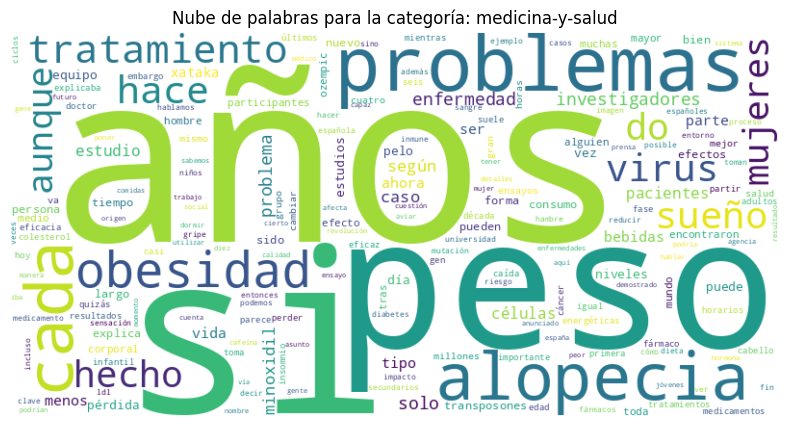

<ipython-input-12-9f1829d7ef66>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_df["Texto_Limpio"] = categoria_df["Texto"].apply(limpiar_texto)


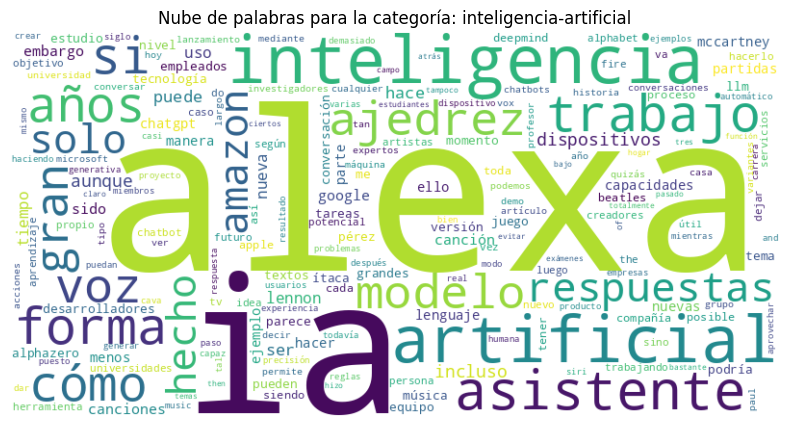

<ipython-input-12-9f1829d7ef66>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_df["Texto_Limpio"] = categoria_df["Texto"].apply(limpiar_texto)


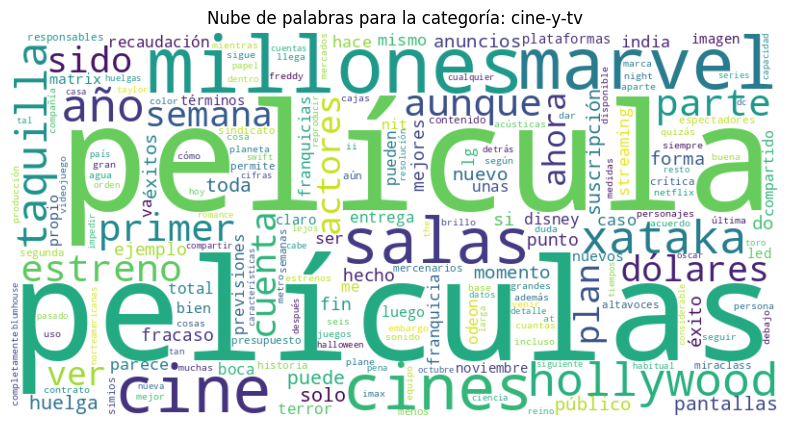

<ipython-input-12-9f1829d7ef66>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoria_df["Texto_Limpio"] = categoria_df["Texto"].apply(limpiar_texto)


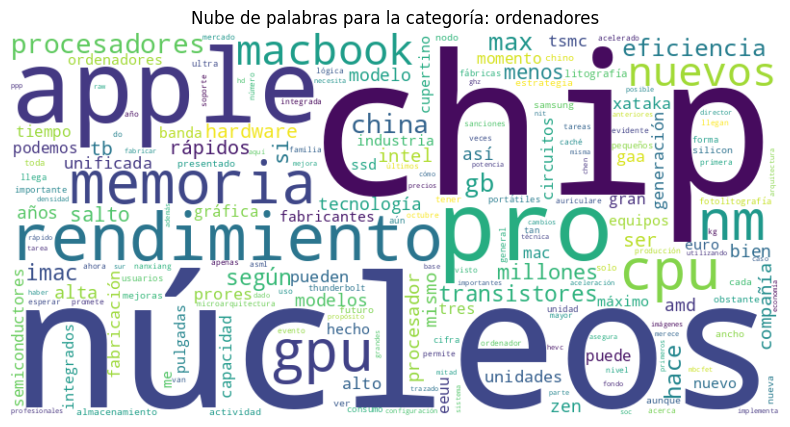

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

categorias_unicas = un_df["Categoria"].unique()

# Limpiar texto para sacar puntuacion y stop words
def limpiar_texto(texto):
    tokens = nltk.word_tokenize(texto)
    tokens = [token for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('spanish'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Arreglado, cat por separado
for categoria in categorias_unicas:

    categoria_df = un_df[un_df["Categoria"] == categoria]


    categoria_df["Texto_Limpio"] = categoria_df["Texto"].apply(limpiar_texto)

    # Contar palabras
    vectorizador = CountVectorizer()
    matriz_conteo = vectorizador.fit_transform(categoria_df["Texto_Limpio"])
    recuento_palabras = matriz_conteo.sum(axis=0)
    palabras_df = pd.DataFrame({'Palabra': vectorizador.get_feature_names_out(), 'Recuento': recuento_palabras.A[0]})
    palabras_df = palabras_df.sort_values(by='Recuento', ascending=False)

    # NuBE
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_df.set_index('Palabra')['Recuento'])

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de palabras para la categoría: {categoria}")
    plt.show()


## Analisis de los resultados
El resultado obtenido fue muy bueno, se filtraron muchas stopwords a pesar de tener palabras en ingles el algoritmo de filtrado tuvo un rendimiento acorde a lo esperado.

En las nubes de palabras se pueden ver las mas significativas de cada categoria con muy poco errores de filtrado, permitiendo obtener una idea de la idea que representa el texto.

#Ejercicio 4:
- Use los modelos de embedding propuestos sobre el final de la Unidad 2 para evaluar la similitud entre los títulos de las noticias de una de las categorías.
- Reflexione sobre las limitaciones del modelo en base a los resultados obtenidos, en contraposición a los resultados que hubiera esperado obtener.


In [ ]:
!pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a9579df350eeea3412fbc730a60dfbd76675e61768f84b384f83bf601f097eb6
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:

from sentence_transformers import SentenceTransformer, util
from prettytable import PrettyTable

# Cargamos el modelo preentrenado multilingüe
modelo = SentenceTransformer('distiluse-base-multilingual-cased-v1')

# Definimos una lista de oraciones
oraciones = un_df[un_df['Categoria'] == 'inteligencia-artificial']
oraciones = oraciones['Titulo'].tolist()


# Codificamos las oraciones
embeddings = modelo.encode(oraciones, convert_to_tensor=True)

# Calculamos las puntuaciones de similitud
puntuaciones_coseno = util.cos_sim(embeddings, embeddings)

# Encontramos las puntuaciones de similitud más altas
pares = []
for i in range(len(puntuaciones_coseno)-1):
    for j in range(i+1, len(puntuaciones_coseno)):
        pares.append({'index': [i, j], 'score': puntuaciones_coseno[i][j]})

# Ordenamos las puntuaciones en orden decreciente
pares = sorted(pares, key=lambda x: x['score'], reverse=True)

# Creamos una tabla para mostrar los resultados
tabla = PrettyTable()
tabla.field_names = ["Oración 1", "Oración 2", "Puntuación de Similitud"]

# Añadimos las filas a la tabla
for par in pares[0:10]:
    i, j = par['index']
    tabla.add_row([oraciones[i], oraciones[j], f"{par['score']:.4f}"])

# Mostramos la tabla
print(tabla)

+-----------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                                                             Oración 1                                                             |                                                        Oración 2                                                        | Puntuación de Similitud |
+-----------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+-------------------------+
|                            Apple y el peligroso riesgo de perder el tren de la inteligencia artificial                            |        La inteligenc

##Reflexion
La puntuación de similitud entre los titulos de noticias es algo superficial de su relación en función de la presencia de palabras clave compartidas. La verdadera comprensión del contenido y contexto de las noticias va más allá de estas puntuaciones, ya que los titulares pueden abordar aspectos diferentes de un tema. Las puntuaciones de similitud son útiles como una herramienta inicial para identificar conexiones potenciales, pero la interpretación precisa y la evaluación completa requieren una lectura más profunda de los artículos completos ya que con estas similitudes solo podemos pensar que su relacion es a lo sumo una relacion moderada.

#Ejercicio 5:
Escriba un programa interactivo que, según la categoría seleccionada por el usuario, devuelva un resumen de las noticias incluidas en ella.

Justifique la elección del modelo usado para tal fin.

Opcional: Investigar y programar un bot de Telegram que entregue un resumen de noticias del blog de su elección. Recomendamos el uso de pyTelegramBotAPI.

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_md

2023-11-02 21:12:38.864894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 21:12:38.864966: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 21:12:38.865018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-02 21:12:41.377397: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 8.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [ ]:
un_df.columns

Index(['Categoria', 'COD_Categoria', 'url', 'Titulo', 'Texto'], dtype='object')

In [ ]:
!pip install sumy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21694 sha256=6871cbbf86f86663fd6b0e6ece2fe6d699e40cbaa3720f815da374076e3073b5
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=7f8f5e1909eb7a57da38741bbb3055e146d829b36cde05e80979a6e68b826d32
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [ ]:
una[0][1]['texto']

'Si hay algo que distingue a los hábitos alimenticios de los españoles con respecto a los de otros países mediterráneos son los horarios. Pero quizá tengamos algo que ganar adelantando nuestro consumo calórico, o al menos ese es el resultado de dos estudios recientes.\nExperimentar con la comida. Durante tiempo los especialistas han observado que picotear o incluso cenar poco antes de irnos a la cama estaba vinculado con mayores niveles de sobrepeso y obesidad. Dos estudios publicados recientemente en la revista Cell Metabolism han indagado en el porqué de esta relación.\n"Los estudios previos (…) habían mostrado que las comidas tardías están asociadas a un incremento del riesgo de obesidad, de grasa corporal e inhabilidad para la pérdida de peso. Queríamos entender por qué", explicaba en una nota de prensa Frank Scheer, profesor en la Escuela de Medicina de Harvard y coautor de uno de los estudios.\nEl hambre. Y ambos equipos señalan en la misma dirección: la clave está en el hambre q

In [ ]:
dos = una[0][1]['texto']
una

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.utils import get_stop_words

def obtener_texto(COD_Categoria):


  parser = PlaintextParser.from_string(leer_texto(COD_Categoria), Tokenizer("spanish"))
  summarizer = LsaSummarizer()
  summarizer.stop_words = get_stop_words("spanish")

  # Generar un resumen
  resumen = summarizer(parser.document, 10)

  return resumen
  # Mostrar el resumen
#  for oracion in resumen:
#      print(oracion)


Por ejemplo contamos con tratamientos que buscan reprogramar células cancerosas para atacar tumores, y virus bacteriófagos capaces de luchar contra temibles infecciones.En Xataka | Los cánceres en jóvenes se han disparado casi un 80% en 30 años.
Pero empecemos por el contexto, La obesidad infantil está íntimamente relacionada con una enorme cantidad de patologías y complicaciones: diabetes tipo 2, hipercolesterolemia, hipertensión, dolor articular, problemas respiratorios, hígado graso...
"Es muy eficaz, pero utilizado como única opción, en monoterapia, no mantiene la eficacia a largo plazo, hay que combinarlo con otros fármacos u otras terapias en función de cada caso.
Durante décadas se han investigado varios métodos para dar con el "hit" perfecto: desde analizar las letras de las canciones, la tonalidad y los acordes e incluso las menciones que acumulan en las redes sociales.Ahora la ciencia ha dado un gran paso para resolver este misterio.
Sobre todo en un momento en el que la inte

In [ ]:
def leer_texto(COD_Categoria):
  df3=un_df[un_df['COD_Categoria'] == COD_Categoria]

  text=[categoria["Texto"] for indice, categoria in df3.iterrows()]
  texto_completo=""
  df3.head(10)
  for x in text:
    texto_completo+=x
  return texto_completo

In [ ]:
def leer_texto(categoria):
  df3=un_df[un_df['Categoria'] == categoria]

  text=[categoria1["Texto"] for indice, categoria1 in df3.iterrows()]
  texto_completo=""
  df3.head(10)
  for x in text:
    texto_completo+=x
  return texto_completo

In [ ]:
df3=un_df[un_df['Categoria'] == 'medicina-y-salud']
df3

,Categoria,COD_Categoria,url,Titulo,Texto
0,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/genes-...,Los “genes saltarines” son uno de los culpable...,Los transposones son fragmentos de ADN que “sa...
1,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/comer-...,Comer a altas horas de la madrugada es una pés...,Si hay algo que distingue a los hábitos alimen...
2,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/hay-nu...,Hay una nueva esperanza para prolongar la vida...,La lucha contra el cáncer tiene muchas dimensi...
3,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/nueva-...,La ciencia que hay detrás de la “vacuna contra...,"Lo lógico es irnos a Dallas, a un pequeño estu..."
4,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/grande...,Las grandes farmacéuticas ya saben cuál es el ...,"Poco a poco y sin demasiada oposición, la obes..."
5,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/galici...,España tiene un enorme problema con las bebida...,"Hace una semana, el presidente de la Xunta de ..."
6,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/que-no...,"Por qué nos despertamos a las 4 de la mañana, ...","Sí, son las cuatro de la mañana. Sí, me he des..."
7,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/genera...,Un medicamento está ganando en silencio la luc...,"Es posible que usted, querido lector, sobre to..."
8,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/revolu...,La revolución de Ozempic: la ciencia detrás de...,"Ozempic va a cambiar el mundo y no, no es una ..."
9,medicina-y-salud,0,https://www.xataka.com/medicina-y-salud/dejar-...,"Tras dejar 250 millones de aves muertas, la pe...","La gripe aviar está de vuelta. Está, de hecho,..."


In [ ]:
#leer_texto('medicina-y-salud')
leer_texto('cine-y-tv')

'20th Century Studios ha publicado este jueves el primer tráiler de \'El Planeta de los Simios: Nuevo Reino’, una esperada película cuyos acontecimientos tienen lugar después de lo visto en ‘La guerra del planeta de los simios’ de 2017.Estamos frente a una nueva entrega moderna de la franquicia que tuvo su origen hace ya más de medio siglo y que, como hemos podido ver, parece seguir conquistando al público. Las imágenes dadas a conocer hoy nos hablan mucho acerca de la producción.Como decimos, si bien no hay demasiados detalles sobre el hilo narrativo de esta película, todo parece indicar que el escenario no es muy favorable para los humanos. Los simios, aparentemente, han adquirido la fuerza necesaria como para dominar el planeta.En esta realidad, algunos clanes se han encarnizado en una batalla salvaje por esclavizar a otros clanes. Pese a que un nuevo líder está construyendo un imperio en base a estas prácticas, un joven simio cuestiona sus enseñanzas y decide seguir su propio camin

In [ ]:
def obtener_resumen(COD_Categoria):
    from sumy.parsers.plaintext import PlaintextParser
    from sumy.nlp.tokenizers import Tokenizer
    from sumy.summarizers.lsa import LsaSummarizer
    from sumy.utils import get_stop_words

    parser = PlaintextParser.from_string(leer_texto(COD_Categoria), Tokenizer("spanish"))
    summarizer = LsaSummarizer()
    summarizer.stop_words = get_stop_words("spanish")


    resumen = summarizer(parser.document, 10)
    oraciones=""
    oraciones = "\n".join(str(oracion) for oracion in resumen)

    return f"Resumen del tema '{COD_Categoria}':\n{oraciones}"

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Función que se ejecuta al hacer clic en un botón de tema
def tema_button_clicked(b):
    with resultado_output:
        resultado_output.clear_output()
        tema = b.description
        resumen = obtener_resumen(tema)
        print(resumen)

# Crear botones para cada tema
tema_buttons = [widgets.Button(description=tema) for tema in categorias_elegidas]

# Asociar la función al hacer clic en los botones
for button in tema_buttons:
    button.on_click(tema_button_clicked)

resultado_output = widgets.Output()

# Mostrar los botones y la salida en la interfaz
buttons_container = widgets.HBox(tema_buttons)
display(buttons_container)
display(resultado_output)



Output()

Probamos con los modulos dados en la catedra pero obtuvimos errores por el tamaño de las noticias, fallas en la convergencia aun aumentando la cantidad de iteraciones o excesivo consumo de memoria RAM en el modelo "abstracto" al punto de desconectarse de una sesion del colab.

Probamos con mas modelos hasta encontrar resultados exitosos con Sumy.

Sumy es una biblioteca de Python que se utiliza para la creación de resúmenes automáticos de texto utilizando técnicas de procesamiento de lenguaje natural, específicamente enfoques de resumen extractivo. Aunque no es un modelo de lenguaje profundo, Sumy se diferencia en varios aspectos:

  - Facilidad de uso: Sumy está diseñado específicamente para tareas de resumen extractivo. Es relativamente fácil de usar y no requiere una configuración compleja. Puede ser una buena opción si buscas una solución simple y rápida para resumir texto sin la necesidad de entrenar modelos o lidiar con problemas de convergencia.

  - Métodos de resumen extractivo: Sumy se enfoca en resúmenes extractivos, lo que significa que selecciona y extrae oraciones directamente del texto de origen en lugar de generar oraciones de resumen de manera abstractiva. Esto puede ser útil cuando se necesita un resumen que conserve el contenido exacto del texto original.

  - Personalización: Sumy ofrece varios algoritmos de resumen extractivo (como Lsa, Luhn, Edmundson, etc.), lo que te permite personalizar el método de resumen según tus necesidades o preferencias.

Sin embargo, es importante destacar que Sumy tiene sus limitaciones:

  - Calidad del resumen: La calidad de los resúmenes generados por Sumy puede variar y no siempre es tan alta como la que se puede obtener con modelos más avanzados de lenguaje natural. Los resúmenes pueden carecer de coherencia y contexto en comparación con resúmenes generados por modelos de lenguaje profundo.

  -Tamaño del modelo: Sumy no utiliza modelos de lenguaje profundo como GPT-3, lo que significa que su capacidad para comprender el contexto y generar resúmenes sofisticados es limitada en comparación con modelos más avanzados.

  -Necesidad de configuración manual: Aunque Sumy es fácil de usar en comparación con desarrollar un modelo de resumen desde cero, aún requiere que los usuarios realicen cierta configuración manual, como la selección del algoritmo de resumen y la cantidad de oraciones en el resumen.

En resumen, Sumy puede ser una opción adecuada si buscas una solución rápida y sencilla para resumir texto, especialmente cuando no tienes acceso a modelos de lenguaje profundo o cuando la convergencia es un problema. Sin embargo, si necesitas resúmenes de alta calidad o resúmenes abstractivos, es posible que desees considerar modelos de lenguaje más avanzados.